# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from adjustText import adjust_text
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 608


['ancud',
 'tsiombe',
 'teguise',
 'adamstown',
 'ierapetra',
 'praia da vitoria',
 'badger',
 'hermanus',
 'klyuchi',
 'blackmans bay',
 'usinsk',
 'grytviken',
 'haiku-pauwela',
 'macau',
 'waitangi',
 'invercargill',
 'sumbe',
 'taoudenni',
 'metu',
 'nova sintra',
 'camana',
 'isafjordur',
 'longyearbyen',
 'port-aux-francais',
 'constancia',
 'tura',
 'xai-xai',
 'thompson',
 'crane',
 'murzuq',
 'kilinochchi',
 'san juanito',
 'corleone',
 'mili',
 'alice springs',
 'quiberon',
 'pacocha',
 'kodiak',
 'djambala',
 'kiunga',
 'edinburgh of the seven seas',
 "port saint john's",
 'puerto natales',
 'rabaul',
 'geraldton',
 'bilibino',
 'labrador city',
 'bulan',
 'anadyr',
 'chajul',
 'yuzhno-kurilsk',
 'bayji',
 'barentu',
 'christchurch',
 'saipan',
 'iqaluit',
 'holualoa',
 'albany',
 'whitehorse',
 'liwale',
 'uturoa',
 'boulazac',
 'wang nam yen',
 'alaghsas',
 'montego bay',
 'puerto ayora',
 'nema',
 'vadso',
 'tannum sands',
 'yellowknife',
 'valera',
 'papatowai',
 'kingst

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | tsiombe
Processing Record 3 of Set 1 | teguise
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | ierapetra
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | usinsk
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | haiku-pauwela
Processing Record 14 of Set 1 | macau
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | sumbe
Processing Record 18 of Set 1 | taoudenni
Processing Record 19 of Set 1 | metu
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | camana
Processing Record 22 of Set 1 | isafjordur
Processing Record 23 of Set 1 | longye

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,17.68,49,39,2.24,CL,1743884426
1,tsiombe,-25.3000,45.4833,23.55,85,44,4.19,MG,1743884427
2,teguise,29.0605,-13.5640,18.12,64,20,3.60,ES,1743884229
3,adamstown,-25.0660,-130.1015,24.20,78,100,6.43,PN,1743884429
4,ierapetra,35.0100,25.7353,14.52,73,43,1.79,GR,1743884431


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,17.68,49,39,2.24,CL,1743884426
1,tsiombe,-25.3000,45.4833,23.55,85,44,4.19,MG,1743884427
2,teguise,29.0605,-13.5640,18.12,64,20,3.60,ES,1743884229
3,adamstown,-25.0660,-130.1015,24.20,78,100,6.43,PN,1743884429
4,ierapetra,35.0100,25.7353,14.52,73,43,1.79,GR,1743884431


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

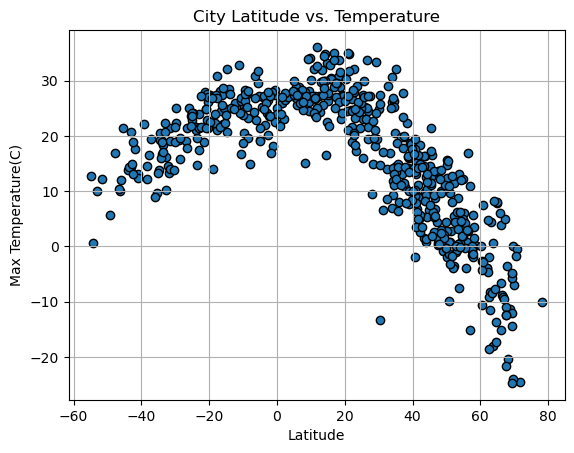

In [15]:
# Build scatter plot for latitude vs. temperature
plt.figure()
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x, y, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

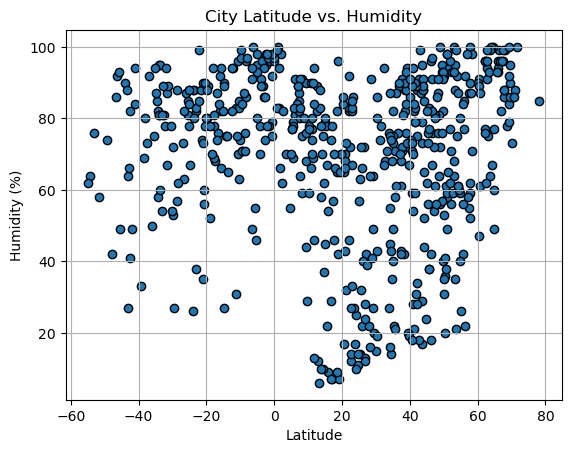

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.figure
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

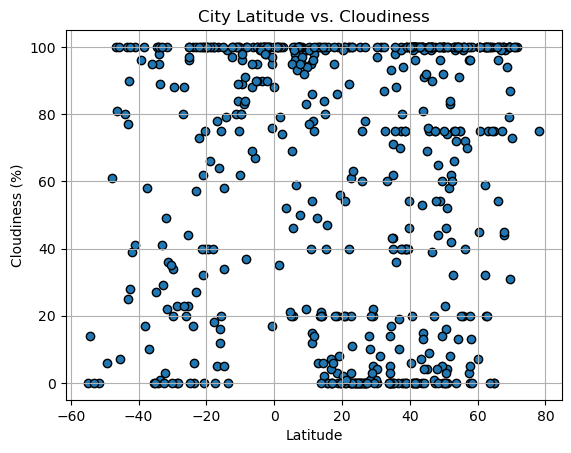

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

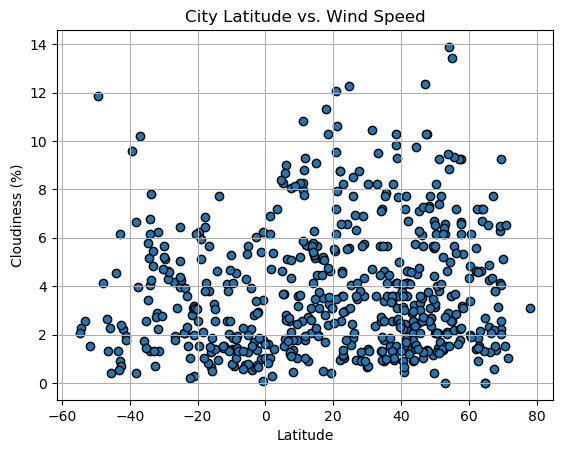

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.figure
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y, marker='o', edgecolors='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y) 
    # F-string for equation display
    formula = f"y = {slope:.2f}x + {intercept:.2f}"
    # Display the r^value
    r_square = r_value ** 2
    print(f"The r^2-value is: {r_square}")
    # Calculate line
    reg_line = slope * x + intercept
    # Make plots
    plt.scatter(x, y, marker='o', edgecolors='black')
    plt.plot(x, reg_line, color='red')
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    plt.text(x_min + 1,
              y_min + 1,
              formula,
              ha='left',
               va='bottom',
                 color='red',
                 fontsize=16)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.show()


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df[city_data_df['Lat'] >= 0]
north_hem_df.reset_index(drop=True, inplace=True)                                     
# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,teguise,29.0605,-13.5640,18.12,64,20,3.60,ES,1743884229
1,ierapetra,35.0100,25.7353,14.52,73,43,1.79,GR,1743884431
2,praia da vitoria,38.7333,-27.0667,14.14,72,40,9.30,PT,1743884432
3,badger,64.8000,-147.5333,7.93,60,0,0.00,US,1743884433
4,klyuchi,52.2667,79.1667,5.56,56,62,5.22,RU,1743884436


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df[city_data_df['Lat'] < 0]
south_hem_df.reset_index(drop=True, inplace=True)
# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,17.68,49,39,2.24,CL,1743884426
1,tsiombe,-25.3000,45.4833,23.55,85,44,4.19,MG,1743884427
2,adamstown,-25.0660,-130.1015,24.20,78,100,6.43,PN,1743884429
3,hermanus,-34.4187,19.2345,20.45,82,100,5.16,ZA,1743884435
4,blackmans bay,-43.0167,147.3167,14.29,64,77,0.89,AU,1743884437


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.758930652635098


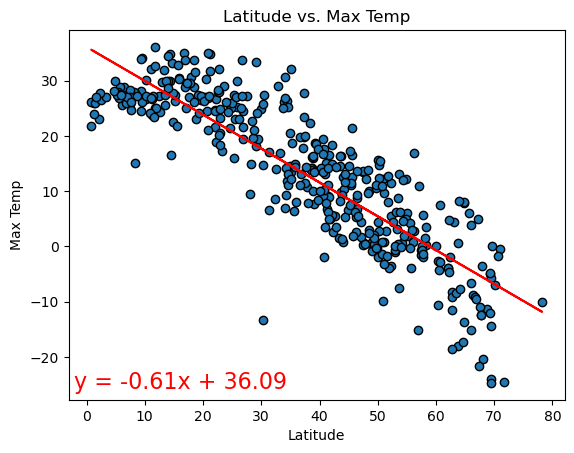

In [38]:
# Linear regression on Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs. Max Temp'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.5087327503014701


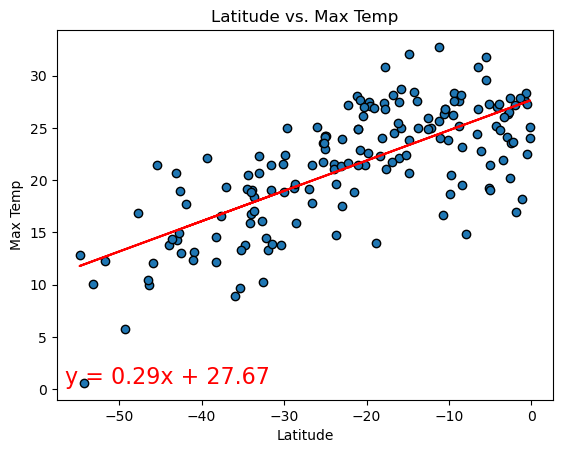

In [39]:
# Linear regression on Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs. Max Temp'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** The linear regression and high r^2 scores show a strong relationship between latitude and temperature. Temperatures get warmer as you get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.045919490589334255


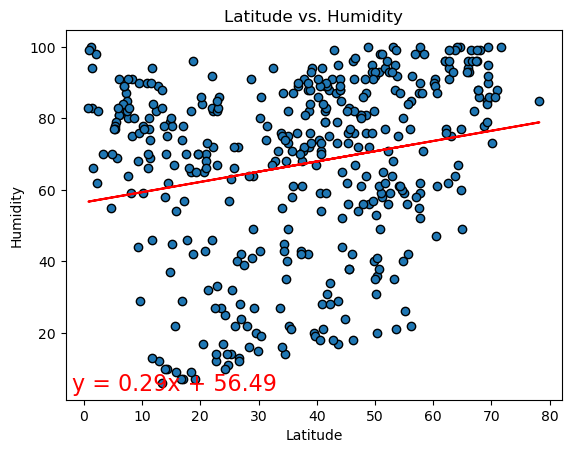

In [40]:
# Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Latitude vs. Humidity'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.09024374714529784


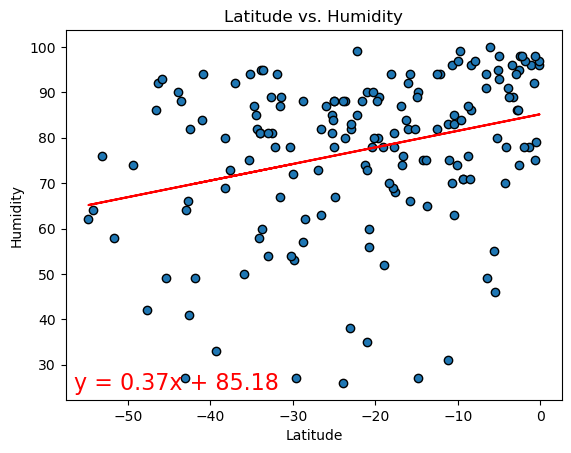

In [41]:
# Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Latitude vs. Humidity'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** The very low r^2 scores of less than 0.1 indicate that latitude does not have a strong relationship with humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.015364177471080069


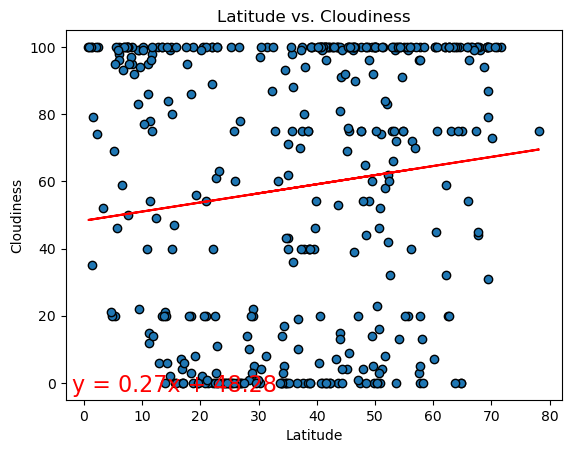

In [42]:
# Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Latitude vs. Cloudiness'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.17127253011810345


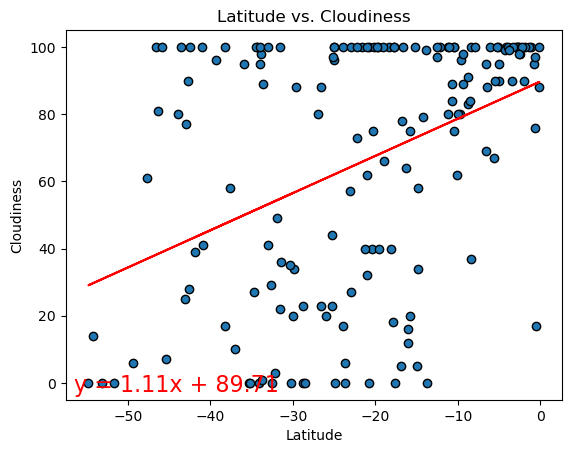

In [43]:
# Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Latitude vs. Cloudiness'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** The plots in these charts are spread all around. Low r^2 scores suggest the relationship between latitude and cloudiness is not strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0022999136570431345


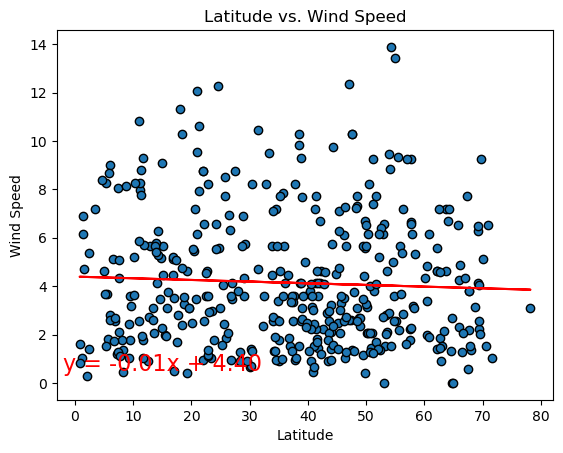

In [44]:
# Northern Hemisphere
plt.figure()
x = north_hem_df['Lat']
y = north_hem_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Latitude vs. Wind Speed'

# Show plot
plot_linear_regression(x,y)
plt.show()

The r^2-value is: 0.04255571671161167


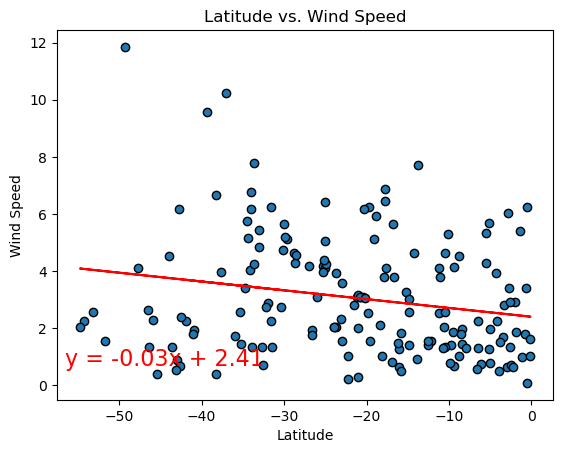

In [45]:
# Southern Hemisphere
plt.figure()
x = south_hem_df['Lat']
y = south_hem_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Latitude vs. Wind Speed'

# Show plot
plot_linear_regression(x,y)
plt.show()

**Discussion about the linear relationship:** These charts have the lowest r^2 scores of them all. Wind speed doesn't seem to be determined by latitude.